# Isolation Forest



## 0.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # Isolation Forest!
from sklearn.metrics import *

import warnings
warnings.simplefilter(action='ignore')

## 1.Isolation Forest 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html  
Isolation Forest Original Paper : https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest

### 1.1 샘플데이터 가져오기

In [2]:
# Single Blob
X1 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/Anomaly_X2.csv')

#### 1) Single Blob

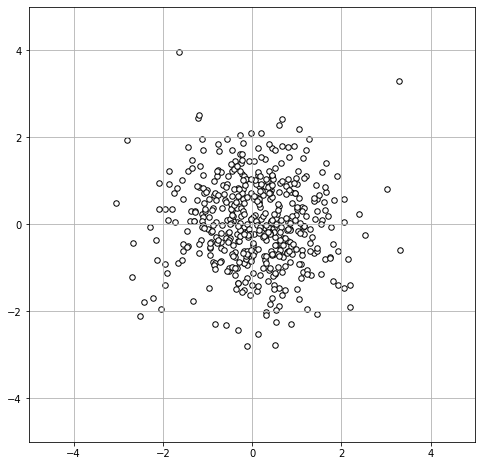

In [3]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [4]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
model.fit(X1)
pred = model.predict(X1) # -1 : abnormal, 1 : normal
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [5]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

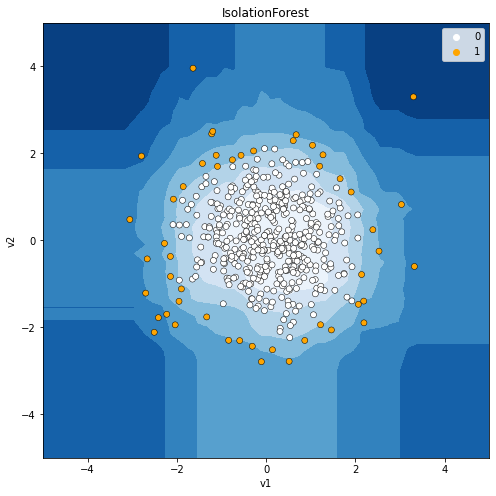

In [6]:
# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X1['v1'], X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * contamination
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators 
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

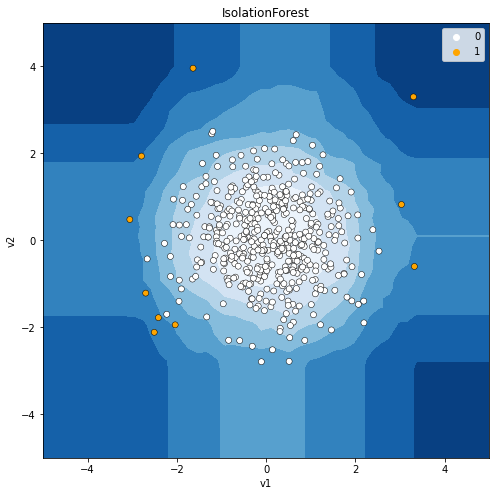

In [7]:
# 여기를 조정해 봅시다.
cont = 0.02
n_est = 100

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X1['v1'], X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

#### 2) Double Blob

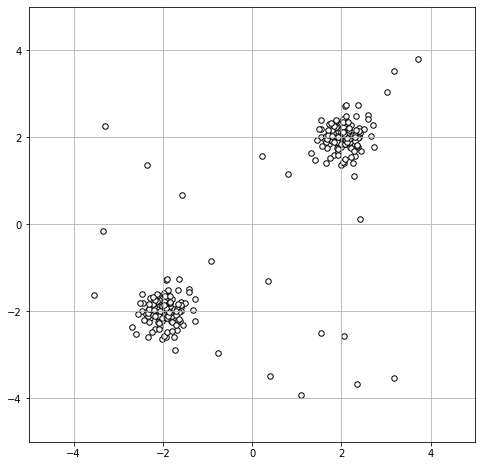

In [8]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [9]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [10]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

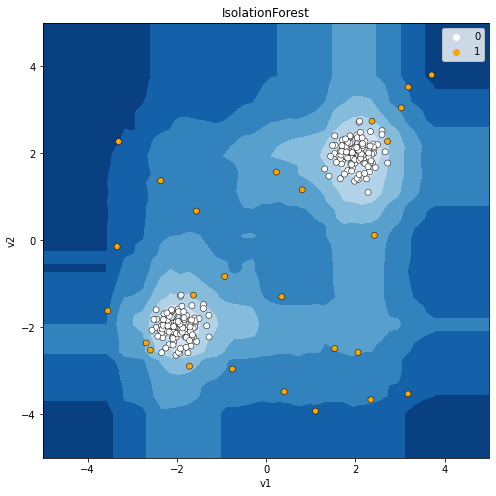

In [11]:
# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X2['v1'], X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * contamination
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators 
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

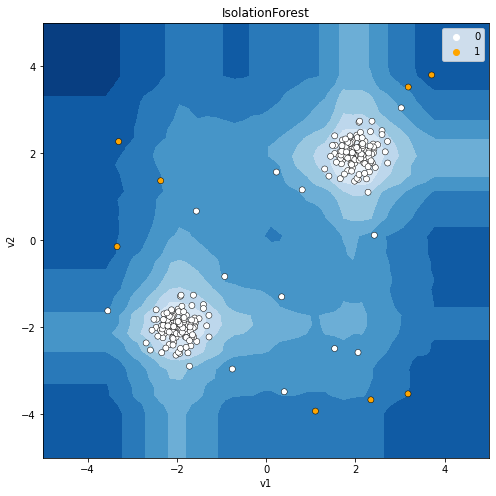

In [12]:
# 여기를 조정해 봅시다.
cont = 0.03
n_est = 100

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(X2['v1'], X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## 2.직원 이직 여부를 예측해 봅시다.

### 2.1 데이터 준비

* 데이터 로딩

In [13]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition2.csv"
data = pd.read_csv(path)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


* x, y 로 나누기

In [14]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [15]:
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

* 가변수화


In [16]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True) 

* 데이터 분할

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state=2022)

In [18]:
x_train.shape, y_train.shape

((805, 38), (805,))

### 2.2 모델링

#### 1) 학습

Isolation Forest 모델은 Anomaly Score를 계산합니다.  
**contamination** 값은 그 중 **Abnormal**로 간주할 비율을 의미합니다.


In [19]:
# 데이터에서 Abnormal(1)의 비율은 0.087 입니다.
y.value_counts() / y.shape[0]

0    0.913043
1    0.086957
Name: Attrition, dtype: float64

In [20]:
cont = (y.value_counts() / y.shape[0])[1]
cont

0.08695652173913043

In [21]:
model = IsolationForest(contamination = cont)

# 비지도 학습입니다. x_train만 사용!
model.fit(x_train)

IsolationForest(contamination=0.08695652173913043)

In [22]:
pred = model.predict(x_val)
pred[:20]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1])

#### 2) Scoring

* .score_samples() : 
    * 결과가 -1 ~ 0 까지로, -1에 가까울 수록 이상치
    * 그러나, 원 논문에서는 anomaly score는 0 ~ 1 사이 값으로 1에 가까울 수록 이상치라고 기술되어 있습니다.
    * 그러므로 우리도 비지도학습의 모든 Score를 
        * 0에 가까울 수록 Normal
        * 0에서 멀어질 수록 Abnormal로 보도록 합시다.

In [23]:
score = model.score_samples(x_train)

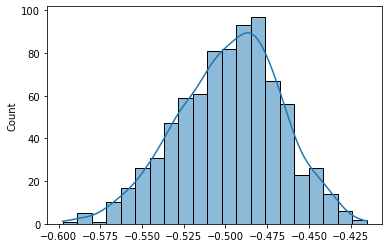

In [24]:
# score의 분포를 보면, -1 ~ 0
sns.histplot(score, kde = True)
plt.show()

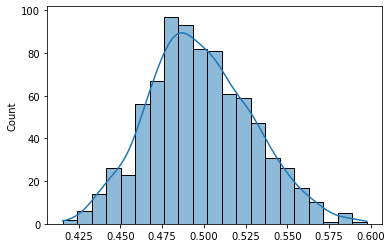

In [25]:
# 그러므로 score에 -1을 곱해주자.
score = -1 * score 

sns.histplot(score, kde = True)
plt.show()

### 2.3 validation으로 예측하고 평가

* 예측 :
    * predict : scoring 하고 나서 contamination에 지정한 비율로 abnormal 구분
        * abnormal = -1
        * normal = 1
    * score_samples : scoring

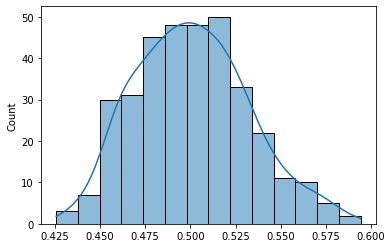

In [26]:
# abnormal 점수 계산
score = model.score_samples(x_val)
score = -1 * score

sns.histplot(score, kde = True)
plt.show()

In [27]:
score.shape

(345,)

In [28]:
# scoring + 분류 : 중 상위 몇 %(contamination 지정한 비율)를 abnormal로 분류
pred = model.predict(x_val)

In [29]:
# 결과 : Abnormal -1, Normal 1
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1, -1,  1

In [30]:
# Abnormal 1, Normal 0 으로 변경합시다.(보통, Abnormal을 1로 표현)
pred = np.where(pred == 1, 0, 1)

In [31]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# 분류 결과를 평가해 봅시다.
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[293  30]
 [ 17   5]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       323
           1       0.14      0.23      0.18        22

    accuracy                           0.86       345
   macro avg       0.54      0.57      0.55       345
weighted avg       0.89      0.86      0.88       345



### 2.4 cut-off (normal : abnormal)value를 조절해가며 지표 계산 및 그래프 그리기

* prec_rec_f1_curve 함수 만들기
    * sklearn에서는 precision, recall curve만 제공됩니다.
    * 그래서, f1 curve도 추가해서 구하고, plot을 그립니다.

In [33]:
score.shape, y_val.shape

((345,), (345,))

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def prec_rec_f1_curve(y, score, pos = 1) :
    precision, recall, thresholds  = precision_recall_curve(y, score, pos_label=1)
    f1 = 2 / (1/precision + 1/recall) # 공식 중요

    # f1, recall, precision curve
    plt.plot(thresholds, np.delete(precision, -1), label = 'precision')
    plt.plot(thresholds, np.delete(recall, -1), label = 'recall')
    plt.plot(thresholds, np.delete(f1, -1), label = 'f1')

    # f1를 최대화 해주는 threshold
    thre = round(thresholds[np.argmax(f1)],4)
    f1s = round(max(f1),4)
    plt.axvline(thre , color = 'darkred', linewidth = .7)
    plt.axhline( f1s, color = 'darkred', linewidth = .7)
    plt.text(thre, .5, thre, color = 'darkred')
    plt.text(min(thresholds), f1s, f1s, color = 'darkred')

    plt.xlabel('Anomaly Score')
    plt.ylabel('Performance')
    plt.legend()
    plt.grid()
    plt.show()

    return precision, recall, f1, thresholds

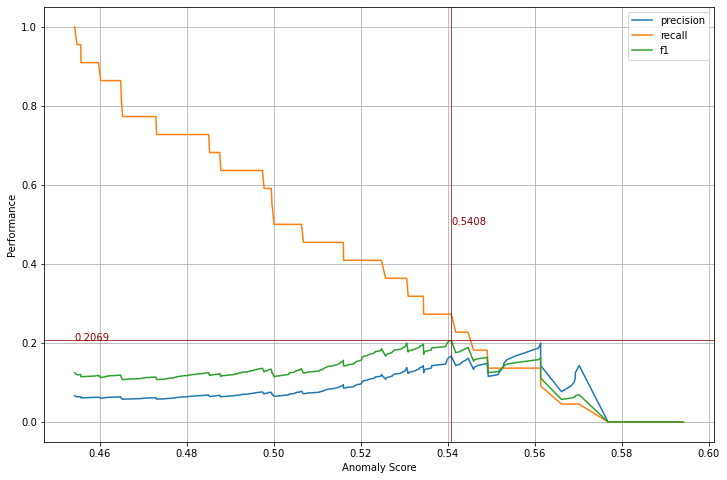

In [35]:
plt.figure(figsize = (12,8))
precision, recall, f1, thresholds = prec_rec_f1_curve(y_val, score)

### 2.5 하이퍼파리미터 조정
* 한꺼번에 튜닝할 수도 있지만, 여기서는 하이퍼파리미터 하나씩 조정하며 경향을 파악하고자 합니다.
* 직접 for 구문을 이용하여 튜닝해보는 것은, 하이퍼파리미터의 조정에 따른 성능 추세를 파악는데 반드시 필요합니다.
    * n_estimators : scoring 하기 위해 만드는 iTree 수. default = 100(이정도면 충분하다고 알려져 있다.
    * max_samples : 학습용 데이터에서 임의로 샘플링 해서 iTree 만듬.


* n_estimators

In [36]:
params = range(10,201,10)
f1 = []
for t in params :
    model = IsolationForest(contamination=0.087, n_estimators=t, random_state=2022)
    model.fit(x_train.values)
    pred = model.predict(x_val.values)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

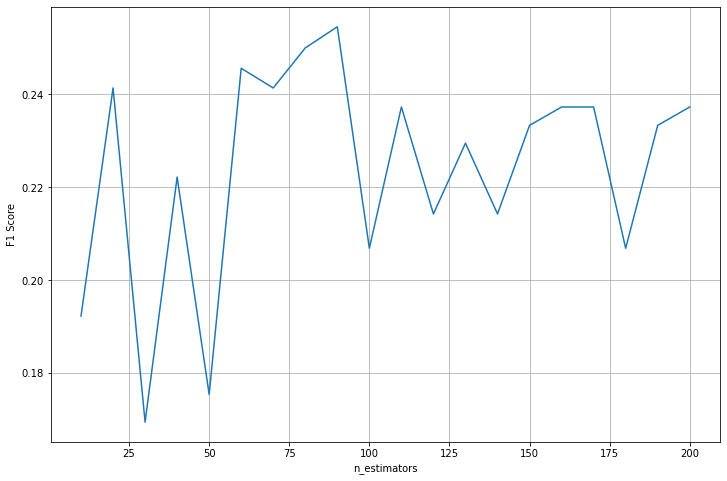

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.grid()
plt.show()

* max_samples

In [38]:
x_train.shape

(805, 38)

In [39]:
samples = [2**n for n in range(5, 11)]
samples

[32, 64, 128, 256, 512, 1024]

In [40]:
f1 = []

for n in samples :
    model = IsolationForest(contamination= .087, max_samples= n, random_state= 2021 )
    model.fit(x_train.values)
    pred = model.predict(x_val.values)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

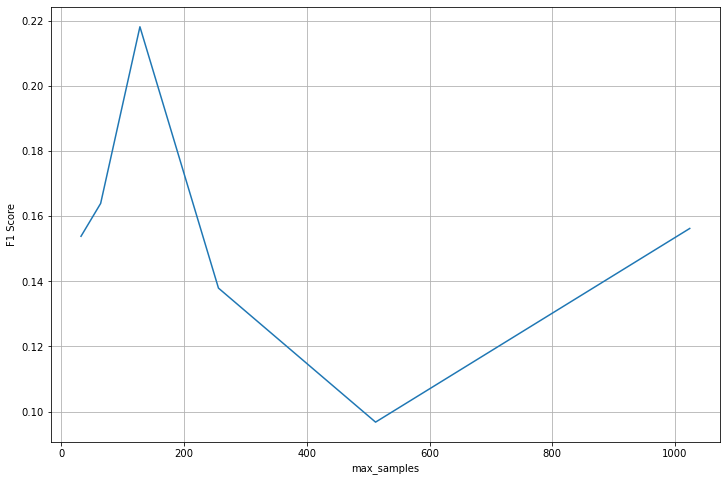

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(samples, f1)
plt.ylabel('F1 Score')
plt.xlabel('max_samples')
plt.grid()
plt.show()

### 2.6 튜닝 결론

* n_estimators 기본값 100 정도면 충분
* max_samples 기본값 256 정도면 충분 (약간 조정해볼 필요는 있음)
* max_depth는 $log_2$[max_samples] 로 결정됨.
* contamination은 전체중 이상치 비율을 정해주는 것인데, 가능하면 score_samples 함수로 계산후 평가하는 것이 더 나은 방법.

## 3.실습 : Semiconductor manufacturing process dataset


![](https://assets.pandaily.com/uploads/2021/10/semiconductor.png)

* 반도체 제조 공정은 시점별로 수많은 센서로부터 정보를 수집하여 공정을 감시합니다. 
* 센서정보와 함께 공정간 발생된 불량품에 대한 정보를 저장하였습니다.
* 불량을 예측해 봅시다.

### 3.1 데이터 준비

* 데이터 로딩

In [42]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보 
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [43]:
target = 'label'

In [44]:
data[target].value_counts() / data.shape[0]

0    0.933631
1    0.066369
Name: label, dtype: float64

* x, y로 나누기 

In [45]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 Dummy Variable

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [48]:
print(x_train.shape, x_val.shape)

(1253, 52) (314, 52)


### 3.2 기본모델링
> * contamination 만 train셋 y의 비율로 지정하여 학습하시오.
* score 점수를 뽑고 분포를 살펴보시오.
* validation 셋으로 예측을 하고, 평가해 봅시다.
* score 점수를 이용하여, 수동으로 cut-off 조절해가며 지표 계산 및 그래프를 그려 봅시다.

0    0.931365
1    0.068635
Name: label, dtype: float64

In [ ]:
# contamination=0.068, max_samples=256 로 지정하고 모델을 생성해 봅시다.


# 비지도 학습입니다. x_train만 사용!


IsolationForest(contamination=0.068, max_samples=256)

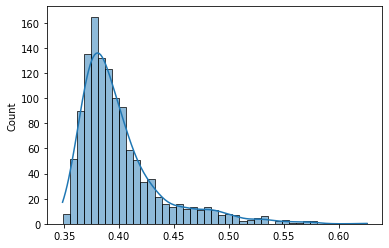

In [ ]:
# 학습 데이터에 대한 abnormal 점수 계산


* 예측 및 평가

[[279  17]
 [ 15   3]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       296
           1       0.15      0.17      0.16        18

    accuracy                           0.90       314
   macro avg       0.55      0.55      0.55       314
weighted avg       0.90      0.90      0.90       314



* threshold 조절에 따른 성능 그래프 그리기

* 적절한 treshold로 잘른 후 1,0으로 변환하고 다시 평가하기

### 3.3 주요 파라미터 튜닝
> * 다음의 하이퍼파라미터를 각각 조절하며, f1 스코어를 구하고, 경향과, 적절한 지점을 파악해 봅시다. (for loop 이용)
    * n_estimators
    * max_samples

#### 1) n_estimators
* 10~400 사이에 범위를 주고 튜닝

#### 2) max_samples
* 10 ~ 1000 사이에 범위를 주고 튜닝

[32, 64, 128, 256, 512, 1024]

## 4.[옵션] GridSearch로 Isolation Forest 튜닝하기
* 시간이 되면 진행합니다.
* 나중에 한번 공부해 보시기 바랍니다.

* GridSearch로 튜닝하기위해서는 한가지 준비가 필요합니다.
* accuracy가 아니라 f1 score로 평가해야 하는데,
    * f1 score를 이용하기 위해서는 추가적인 옵션이 필요합니다. 
    * pos_label=1, average = 'macro'
* 이렇게 지정하려면, make_scorer 라는 함수를 써야 합니다.
* 그래서 다음의 절차로 튜닝을 합니다.
    * make_scorer로 함수와 추가 옵션 지정
    * GridSearchCV(model, params, cv=5, scoring = newScorer)

In [ ]:
from sklearn.model_selection import GridSearchCV

### 4.1 make_scorer
* help : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

* 문법 : make_scorer(평가함수, 추가옵션1 = , 추가옵션2 = , ...)
    * 평가함수 : accuracy_score, f1_scorer...등
    * 추가옵션 : y_true, y_pred 이외의 옵션.

In [ ]:
# f1_score 는  pos_label=1, average = 'macro' 추가옵션을 지정해야 합니다.
f1score = make_scorer(f1_score, pos_label=1, average = 'macro')

### 4.2 GridSearchCV

In [ ]:
# 하이퍼파라미터 값 범위 지정
params = {'n_estimators':[50,100,150], 'max_samples':range(100,1001,200)}

# 모델선언
model = IsolationForest(contamination=0.068)

# GridSearchCV 옵션 scoring = 새평가함수(make_scorer로 만든)
m2 = GridSearchCV(model, params, cv = 5, scoring = f1score)

# 학습
# 원래 IsolationForest 비지도 학습이므로, x_train만 필요합니다.
# 그러나 튜닝을 위해서는 예측과 평가가 필요하므로 y_train도 입력합니다.
m2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=IsolationForest(contamination=0.068),
             param_grid={'max_samples': range(100, 1001, 200),
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(f1_score, pos_label=1, average=macro))

### 4.3 GridSearchCV 결과 Plotting

* .cv_results_ 를 DataFrame로 변환하기

In [ ]:
result = pd.DataFrame(m2.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055154,0.000997,0.012431,4.705603e-04,100,50,"{'max_samples': 100, 'n_estimators': 50}",0.039216,0.051282,0.042838,0.039841,0.040650,0.042765,0.004431,4
1,0.107185,0.000414,0.023615,5.055897e-04,100,100,"{'max_samples': 100, 'n_estimators': 100}",0.039216,0.052493,0.045153,0.040650,0.040984,0.043699,0.004821,1
2,0.162673,0.000843,0.034947,6.368541e-04,100,150,"{'max_samples': 100, 'n_estimators': 150}",0.039216,0.048718,0.045515,0.037634,0.040161,0.042249,0.004180,7
3,0.056777,0.000386,0.013003,2.611745e-07,300,50,"{'max_samples': 300, 'n_estimators': 50}",0.039062,0.047431,0.044974,0.037940,0.040650,0.042012,0.003613,11
4,0.110668,0.000448,0.024029,4.004143e-05,300,100,"{'max_samples': 300, 'n_estimators': 100}",0.039062,0.046875,0.045699,0.037787,0.040486,0.041982,0.003636,13


In [ ]:
# 필요한 칼럼만 저장
result= result[['param_max_samples', 'param_n_estimators', 'mean_test_score' ]]

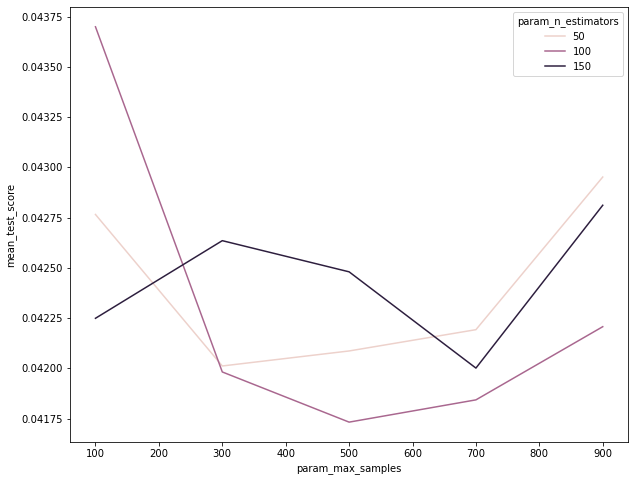

In [ ]:
# 결과를 차트로 그려봅시다.

plt.figure(figsize=(10,8))
sns.lineplot(x= 'param_max_samples', y ='mean_test_score', data = result, hue = 'param_n_estimators')
plt.show()